## 04.04.2022

# <center>Извлечение признаков из временного ряда</center>

### Задание №1

In [129]:
import numpy as np
import pandas as pd
import math
from scipy import optimize
from scipy.optimize import minimize

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
passengers = pd.read_csv('C:/Users/79811/anaconda3/passengers.csv', index_col=0, parse_dates=True)

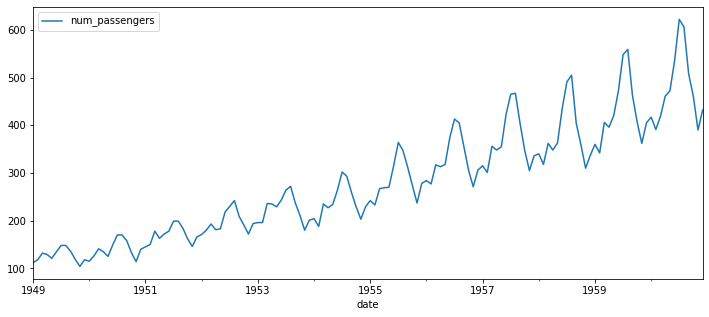

In [4]:
passengers.plot(figsize=(12,5))
plt.show()

In [5]:
passengers.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='date', length=144)

In [6]:
passengers['month'] = passengers.index.month

In [7]:
passengers

,num_passengers,month
date,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5
...,...,...
1960-08-01,606,8
1960-09-01,508,9
1960-10-01,461,10


In [8]:
passengers['x0'] = 1

In [9]:
passengers

,num_passengers,month,x0
date,,,
1949-01-01,112,1,1
1949-02-01,118,2,1
1949-03-01,132,3,1
1949-04-01,129,4,1
1949-05-01,121,5,1
...,...,...,...
1960-08-01,606,8,1
1960-09-01,508,9,1
1960-10-01,461,10,1


In [10]:
passengers['num'] = range(0, len(passengers))

In [11]:
passengers

,num_passengers,month,x0,num
date,,,,
1949-01-01,112,1,1,0
1949-02-01,118,2,1,1
1949-03-01,132,3,1,2
1949-04-01,129,4,1,3
1949-05-01,121,5,1,4
...,...,...,...,...
1960-08-01,606,8,1,139
1960-09-01,508,9,1,140
1960-10-01,461,10,1,141


In [12]:
passengers['sin'] = np.sin((2*np.pi*(passengers['num']))/12)

In [13]:
passengers

,num_passengers,month,x0,num,sin
date,,,,,
1949-01-01,112,1,1,0,0.000000
1949-02-01,118,2,1,1,0.500000
1949-03-01,132,3,1,2,0.866025
1949-04-01,129,4,1,3,1.000000
1949-05-01,121,5,1,4,0.866025
...,...,...,...,...,...
1960-08-01,606,8,1,139,-0.500000
1960-09-01,508,9,1,140,-0.866025
1960-10-01,461,10,1,141,-1.000000


In [14]:
passengers['cos'] = np.cos((2*np.pi*(passengers['num']))/12)

In [15]:
passengers

,num_passengers,month,x0,num,sin,cos
date,,,,,,
1949-01-01,112,1,1,0,0.000000,1.000000e+00
1949-02-01,118,2,1,1,0.500000,8.660254e-01
1949-03-01,132,3,1,2,0.866025,5.000000e-01
1949-04-01,129,4,1,3,1.000000,6.123234e-17
1949-05-01,121,5,1,4,0.866025,-5.000000e-01
...,...,...,...,...,...,...
1960-08-01,606,8,1,139,-0.500000,-8.660254e-01
1960-09-01,508,9,1,140,-0.866025,-5.000000e-01
1960-10-01,461,10,1,141,-1.000000,-1.175970e-14


In [116]:
def mse (teta1, teta2, teta3, teta4):
    return np.mean((-teta2 * passengers['num'] - teta3 * passengers['sin'] - teta4 * passengers['cos'] - teta1 * passengers['x0'] + passengers['num_passengers'])**2)

In [117]:
res = optimize.minimize(lambda x: mse(x[0], x[1], x[2], x[3]),(1,1,1,1))
res

      fun: 1042.0664148569558
 hess_inv: array([[ 3.36421808e+00, -6.87939622e-02, -1.95646210e+00,
         3.18604947e+00],
       [-6.87939622e-02,  1.54996607e-03,  4.05933889e-02,
        -6.50252263e-02],
       [-1.95646210e+00,  4.05933889e-02,  1.14464614e+00,
        -1.85227214e+00],
       [ 3.18604947e+00, -6.50252263e-02, -1.85227214e+00,
         3.05245618e+00]])
      jac: array([1.52587891e-05, 3.05175781e-05, 3.05175781e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 277
      nit: 9
     njev: 53
   status: 2
  success: False
        x: array([ 90.83235481,   2.64987774,   5.42625934, -45.49952552])

In [119]:
teta1, teta2, teta3, teta4 = res.x

In [120]:
a = teta2 * passengers['num'] + teta3 * passengers['sin'] + teta4 * passengers['cos'] 

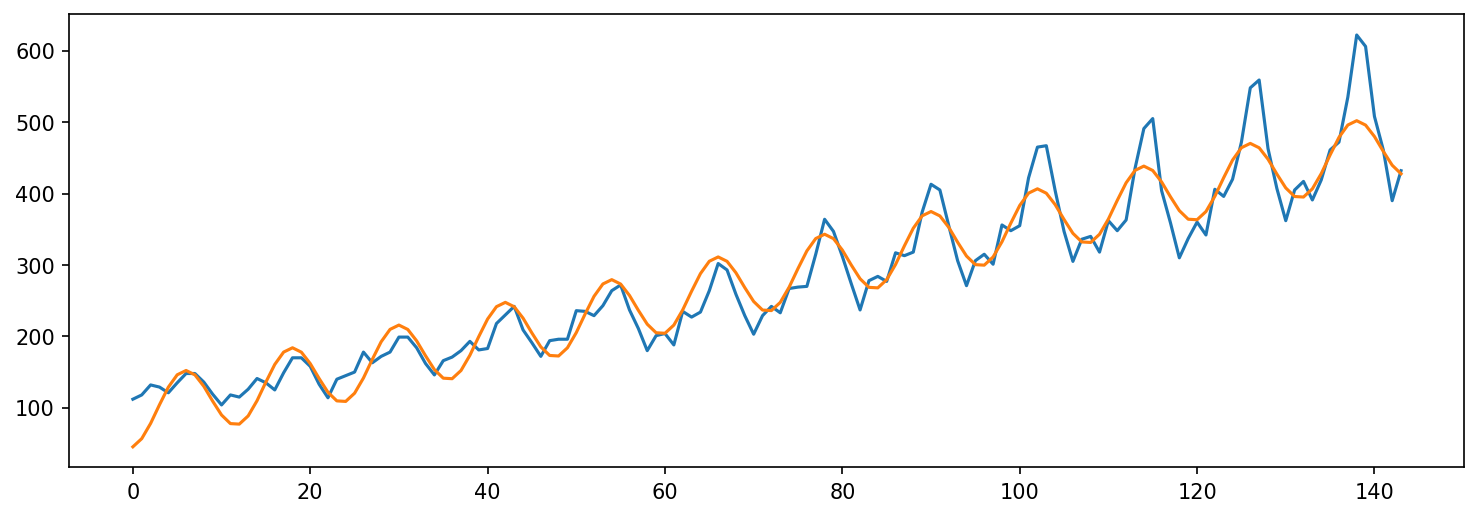

In [118]:
plt.figure(figsize=(12,4), dpi = 150)
plt.plot(passengers['num_passengers'].values)
plt.plot(np.dot(passengers.loc[:, 'x0':], res.x))

#### Для построения прогноза воспользуемся методом .predict(start, end) и моделью Хольта-Уинтерса

In [130]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [131]:
holt_winters_trend = ExponentialSmoothing(a, initialization_method="estimated",
                                          trend="add", seasonal="add").fit()

C:\Users\79811\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [132]:
start = a.index[-1] + pd.DateOffset(months=1)
end = start + pd.DateOffset(months=35)
start, end

(Timestamp('1961-01-01 00:00:00'), Timestamp('1963-12-01 00:00:00'))

In [133]:
holt_winters_forecast = holt_winters_trend.predict(start=start, end=end)

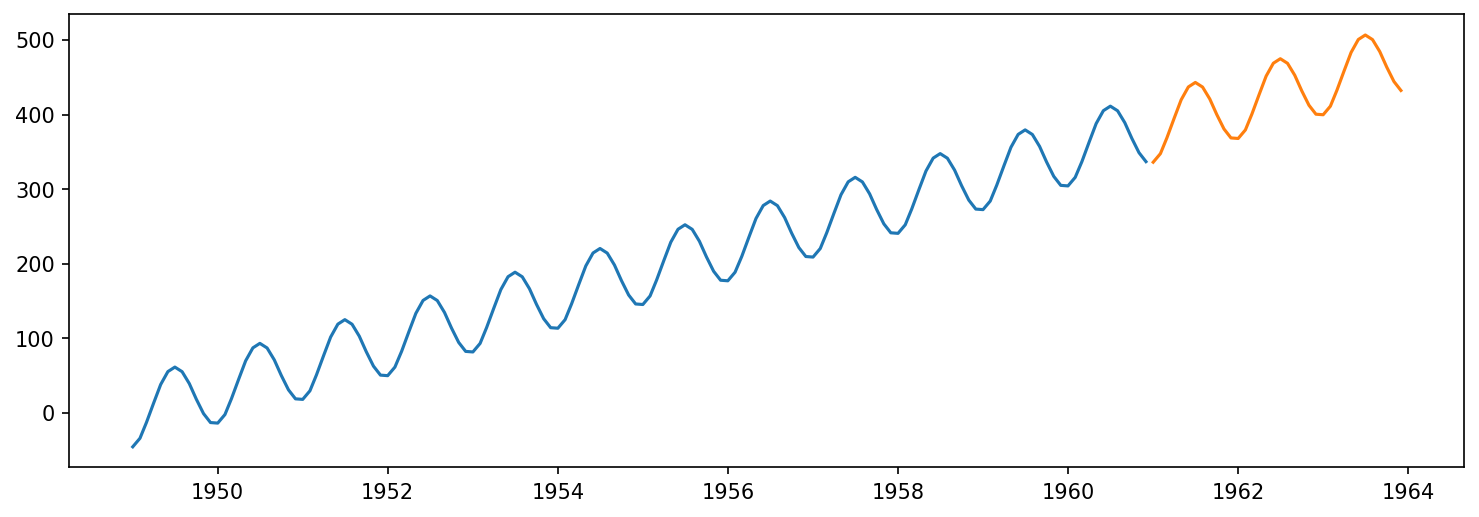

In [134]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(a)
plt.plot(holt_winters_forecast)
plt.show()

In [127]:
ostatki = passengers['num_passengers'] - a

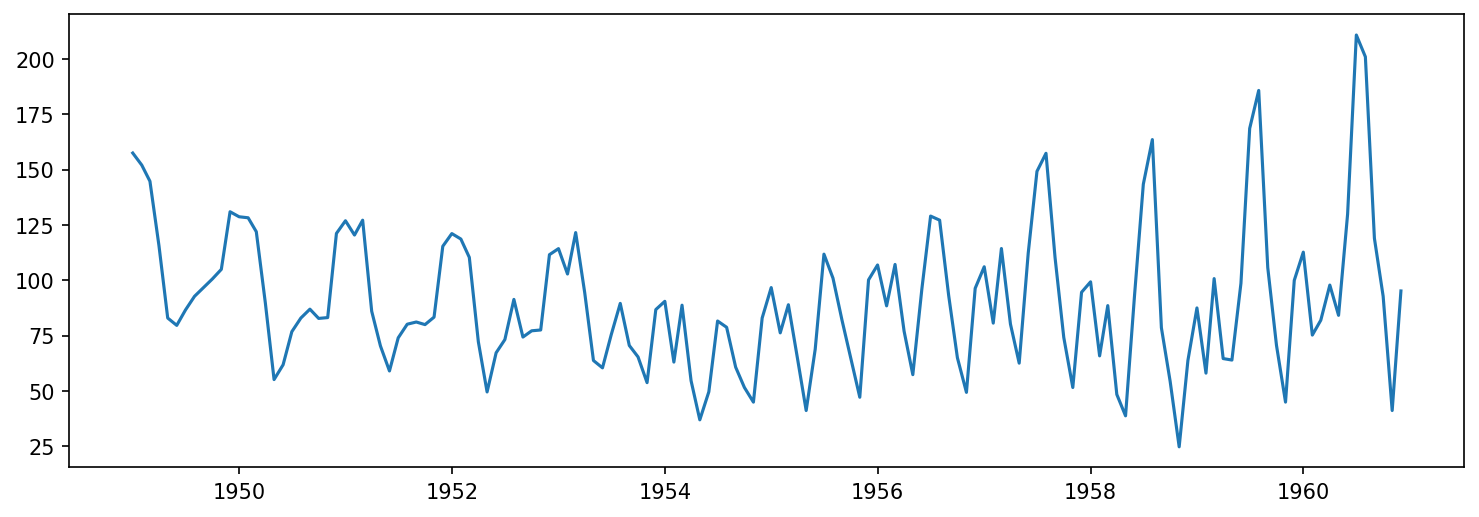

In [128]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(ostatki)
plt.show()